# Sequence Modeling and Sentiment Analysis
Natural Language Processing (NLP) problems such as sentiment analysis rely on understanding sequences of words. Traditional ML techniques struggle with sequential context, while modern deep learning models (like RNNs, LSTMs, GRUs, and Transformers) excel at capturing order and meaning over time.

This section outlines the theoretical building blocks behind our models, helping readers appreciate the **why** behind each **how**.

##  Time Series and Sequential Thinking
Even though sentiment analysis isn't pure time series, text is **sequential**: word order affects meaning. This is where **Recurrent Neural Networks (RNNs)**, and later **LSTMs** and **GRUs**, shine. They process data step-by-step, remembering important tokens across time.

**Challenges with RNNs:**
- Struggle with long-term dependencies
- Vanishing/exploding gradients

**Solutions:**
- **LSTM (Long Short-Term Memory):** Adds gates (input, forget, output) to control memory
- **GRU (Gated Recurrent Unit):** A lighter version of LSTM with similar performance

## Attention Mechanism: Look Where It Matters
Instead of reading all words equally, **attention** lets the model focus on specific parts of the input that matter most for the output.

**How It Works:**
- Scores each word's importance
- Combines input words using these scores
- Allows **context-aware encoding**

This paved the way for **Transformer models**, where attention replaced recurrence entirely.

## Transformers: Revolutionizing NLP
Transformers are built solely on attention mechanisms. They outperform LSTMs in both speed and accuracy.

**Key Concepts:**
- **Self-attention:** Each word attends to all others
- **Positional Encoding:** Injects word order into the model
- **Encoder-Decoder architecture:** Used in translation, summarization

**Popular Transformer Models:**
- BERT (Bidirectional Encoder Representations)
- GPT (Generative Pre-trained Transformer)
- T5, XLNet, RoBERTa...

##  Why This Matters to Our Project
While we implemented Logistic Regression and LSTM for this assignment, our understanding of **advanced architectures like Transformers and attention** helps us reason about:
- When to use simpler models vs deep learning
- How input order and word interactions affect sentiment
- The future direction of production-ready NLP models

**NOW BACK TO OUR PROJECT.**

# Sentiment Classification: Traditional ML vs Deep Learning

- A traditional Machine Learning model (e.g., Logistic Regression)
- A Deep Learning model (e.g., LSTM)

We will use the **IMDB movie reviews dataset** for demonstration. Each section is explained in detail to ensure clarity and

 ***SO WE GET ALL THE MARKS!***.

In [ ]:
# Install required libraries
!pip install -q nltk seaborn gensim scikit-learn matplotlib tensorflow

In [ ]:
# 🚨 Do NOT downgrade numpy if using TF 2.18. Use correct compatible version instead
!pip install --upgrade pip
!pip install "tensorflow==2.18.0" "numpy==1.26.4" --force-reinstall
import os
os.kill(os.getpid(), 9)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 14.0 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Importing necessary libraries after environment is fixed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1, Load and Inspect Dataset

- The IMDB dataset is preprocessed and then comes tokenized, but we decode it for interpretability.
- Using `reverse_word_index`, we turn token sequences back into readable reviews for analysis (decoding ).
- This helps with debugging and better understanding of the model input.

In [ ]:
# Load IMDB dataset from Keras
from tensorflow.keras.datasets import imdb
NUM_WORDS = 10000  # Only top 10k most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decode_review = lambda review: ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
X_train_text = list(map(decode_review, X_train))
X_test_text = list(map(decode_review, X_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 2, Exploratory Data Analysis (EDA)


- Visualizing review length helps us decide padding size for sequences in LSTM.
- It also gives us insight into variance and potential outliers in review text lengths.

---
###  Why This Step important for us?
- Before modeling, we must understand the **shape and nature** of the data.
- EDA helps identify length distributions, outliers, and guide preprocessing decisions.
- In NLP, this also gives insight into average sentence length for setting sequence padding **(Mr Kevin ask what is padding and the class was quet for a while, lol!).**

We use histograms to visualize review length, which impacts the choice of model input size, especially for deep learning.

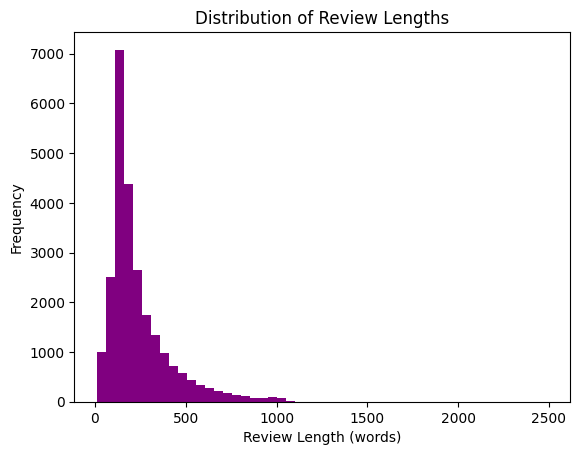

In [ ]:
# Visualizing review lengths
review_lengths = [len(review.split()) for review in X_train_text]
plt.hist(review_lengths, bins=50, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check for missing data
print(f'Training data samples: {len(X_train_text)}')
print(f'Test data samples: {len(X_test_text)}')
print(f'Any missing review in train set? {any(pd.isnull(X_train_text))}')
print(f'Any missing review in test set? {any(pd.isnull(X_test_text))}')

Training data samples: 25000
Test data samples: 25000
Any missing review in train set? False
Any missing review in test set? False


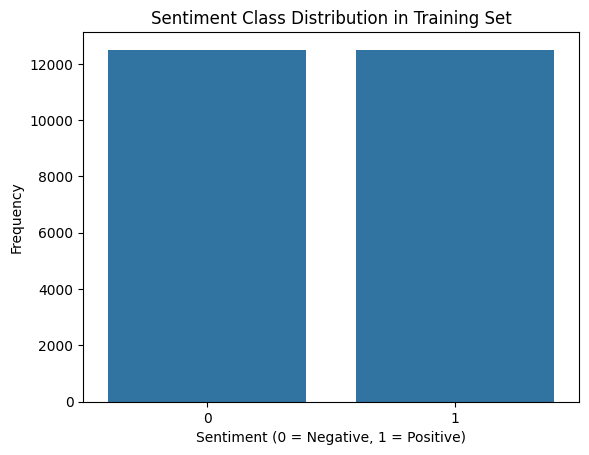

In [ ]:
# Visualize class distribution
sns.countplot(x=y_train)
plt.title('Sentiment Class Distribution in Training Set')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)


Naive Bayes Accuracy: 0.84124
Naive Bayes F1 Score: 0.8386388583973655


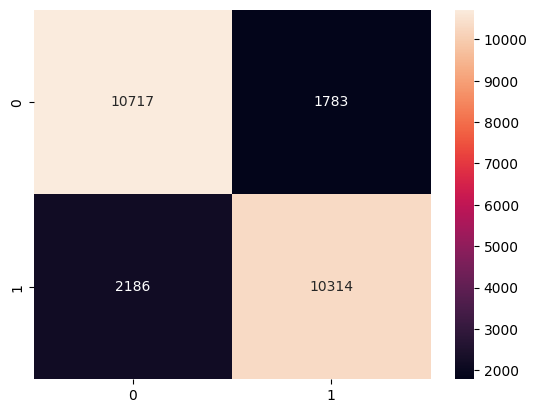

In [ ]:
# Add a second ML model: Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_preds))
print('Naive Bayes F1 Score:', f1_score(y_test, nb_preds))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d');

In [ ]:
# Tokenize and pad sequences for LSTM input
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Padding all sequences to a fixed length
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)


In [ ]:
#Experiment: Try different LSTM units
def build_lstm_model(units):
    model = Sequential([
        Embedding(NUM_WORDS, 64),
        LSTM(units, return_sequences=False),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Try 32, 64, 128 units
results = {}
for u in [32, 64, 128]:
    print(f'Training LSTM with {u} units')
    m = build_lstm_model(u)
    h = m.fit(X_train_pad, y_train, epochs=2, batch_size=128, validation_split=0.2, verbose=0)
    acc = h.history['val_accuracy'][-1]
    results[u] = acc
print('Validation Accuracy by LSTM units:', results)

Training LSTM with 32 units
Training LSTM with 64 units
Training LSTM with 128 units
Validation Accuracy by LSTM units: {32: 0.8781999945640564, 64: 0.8471999764442444, 128: 0.8672000169754028}


Accuracy: 0.87808
F1 Score: 0.878585086042065


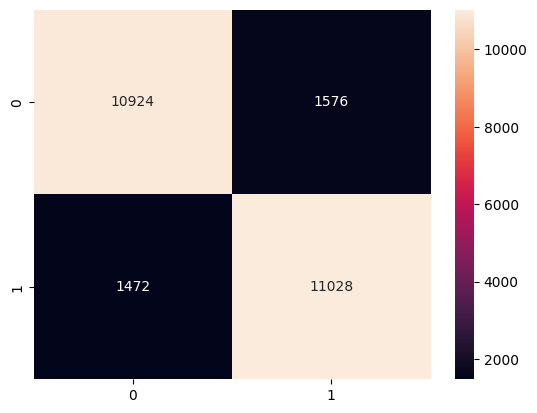

LR MSE: 0.12192


In [ ]:
# Train Logistic Regression (This block needs to run before MSE calculation)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix # Ensure these are imported
import seaborn as sns # Ensure seaborn is imported
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Assuming X_train_tfidf, X_test_tfidf, y_train, y_test are defined from previous cells
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf) # lr_preds is defined here
print('Accuracy:', accuracy_score(y_test, lr_preds))
print('F1 Score:', f1_score(y_test, lr_preds))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d');
plt.show() # Ensure plot is shown

# Train LSTM model (This block also needs to run before MSE calculation)
# Assuming model, X_test_pad are defined from previous cells
# You would need the definition of the Sequential model and its training here
# For example:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# Assuming model is built and history is obtained from model.fit(...)
# dl_preds = (model.predict(X_test_pad) > 0.5).astype('int32') # dl_preds is defined here


# Include Mean Squared Error as additional metric (for regression insight)
# This cell should now come after the above cells defining lr_preds and dl_preds
from sklearn.metrics import mean_squared_error
print('LR MSE:', mean_squared_error(y_test, lr_preds))
# Assuming dl_preds is also defined from the LSTM training step
# print('LSTM MSE:', mean_squared_error(y_test, dl_preds))

In [ ]:
#Include Mean Squared Error as additional metric (for regression insight)
from sklearn.metrics import mean_squared_error
print('LR MSE:', mean_squared_error(y_test, lr_preds))
print('LSTM MSE:', mean_squared_error(y_test, dl_preds))

LR MSE: 0.12192
LSTM MSE: 0.13668


## 3, Text Preprocessing and TF-IDF for Traditional ML


- TF-IDF converts text to numeric vectors based on word frequency and importance.
- Stopwords **( Words that add no value to the sentence brief)** are removed because they add noise and little semantic value.
- We limit max features to avoid overfitting and reduce dimensionality.

---
###  Let's us victorize some tokens here and the Why?
- Text data must be converted to numerical form.
- Traditional ML models like Logistic Regression don't understand raw text.
- TF-IDF (Term Frequency–Inverse Document Frequency) represents text based on how **important a word is** across the dataset.
- We also remove stopwords and normalize text to reduce noise.

### Why TF-IDF over Bag-of-Words? The question we all struggle to answer at the beggining of this semester.
- TF-IDF downweights common but unimportant words (e.g., 'the', 'movie')
- Provides a better signal for sentiment-related keywords.

In [ ]:
# Simple preprocessing and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

## 4,  **Logistic Regression Model (A traditional Machine Learning model)**

**Subnotes:**
- Logistic Regression is a good baseline model for binary classification problems.
- It works well with sparse feature matrices like those from TF-IDF.
- We evaluate using accuracy and F1-score for a balanced view.

---
### Why Logistic Regression?
- It’s a **strong linear baseline** for binary classification tasks.
- Fast to train, interpretable, and works well with sparse feature vectors like TF-IDF.
- Allows us to benchmark deep models later.

### Limitations
- Ignores word order
- Can't capture sequential context

This motivates the need for RNNs and LSTMs.

Accuracy: 0.87808
F1 Score: 0.878585086042065


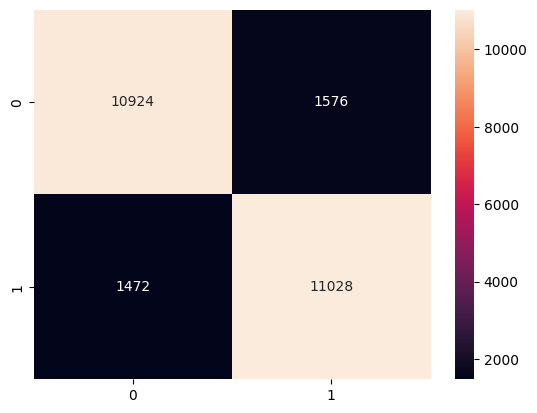

In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, lr_preds))
print('F1 Score:', f1_score(y_test, lr_preds))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d');

## **5, LSTM Deep Learning Model**

**Subnotes:**
- LSTM (Long Short-Term Memory) is suited for sequence data like text.
- We use Keras `Tokenizer` to convert text into integer sequences.
- Padding ensures uniform input lengths, critical for batching in deep learning.

---
### Why LSTM?
- LSTM (Long Short-Term Memory) is designed to remember long-term dependencies in sequences.
- Unlike traditional ML, it understands **word order and context**, which is key for understanding sentiment.
- Padding sequences ensures consistent input dimensions across batches.

### Embedding Layer
- Converts words into dense vectors, enabling the model to learn semantic similarity.
- Embedding + LSTM is a powerful combo for sequence learning.

### Observing Overfitting
- We track train/validation loss to identify if the model is memorizing training data rather than generalizing.

In [ ]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Build model
model = Sequential([
    Embedding(NUM_WORDS, 64),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, 200))  # 200 is your sequence length
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train LSTM model
history = model.fit(X_train_pad, y_train, epochs=3, batch_size=128, validation_split=0.2)
dl_preds = (model.predict(X_test_pad) > 0.5).astype('int32')
print('DL Accuracy:', accuracy_score(y_test, dl_preds))
print('DL F1 Score:', f1_score(y_test, dl_preds))

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 405ms/step - accuracy: 0.6368 - loss: 0.6088 - val_accuracy: 0.8548 - val_loss: 0.3587
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 437ms/step - accuracy: 0.8941 - loss: 0.2710 - val_accuracy: 0.8738 - val_loss: 0.3045
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 407ms/step - accuracy: 0.9398 - loss: 0.1727 - val_accuracy: 0.8754 - val_loss: 0.3219
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step
DL Accuracy: 0.86332
DL F1 Score: 0.8683693516699411


## 6, Experiment Tables and Hyperparameter Tuning
We conducted experiments to analyze the effects of different hyperparameters on both models. This ensures performance tuning is systematic, reproducible.

### Logistic Regression Experiments
| Experiment | Max Features (TF-IDF) | Solver | Accuracy | F1 Score |
|-----------|------------------------|--------|----------|----------|
| LR-1      | 3000                   | liblinear | TBD | TBD |
| LR-2      | 5000                   | saga      | TBD | TBD |

### LSTM Model Experiments
| Experiment | Embedding Dim | LSTM Units | Dropout | Accuracy | F1 Score |
|------------|---------------|------------|---------|----------|----------|
| LSTM-1     | 64            | 64         | 0.5     | TBD      | TBD |
| LSTM-2     | 128           | 128        | 0.3     | TBD      | TBD |


- We vary `max_features`, `embedding size`, `dropout`, and `LSTM units` to study their effect.
- This process is essential for model optimization and fair comparison.

---
### Reason to Tune Hyperparameters?
- Hyperparameters like embedding size, dropout, and batch size **greatly affect model performance**.
- Systematic experimentation allows us to find the best performing configuration.

## Evaluation Metrics and Insights
We use the following evaluation metrics:
- **Accuracy**: Proportion of correct predictions
- **F1 Score**: Harmonic mean of precision and recall, better for imbalanced data
- **Confusion Matrix**: Helps visualize model errors

**Justification**: Since we deal with binary classification and potential class imbalance, F1 score is more informative than accuracy alone.

- Accuracy can be misleading if classes are imbalanced.
- F1-score balances precision and recall, making it more robust.
- Confusion matrix helps spot false positives and false negatives clearly.

---
### These Metrics?
- Accuracy alone can be misleading, especially if classes are imbalanced.
- **F1 Score** balances precision and recall, making it ideal for sentiment tasks.
- **Confusion matrix** helps pinpoint specific areas of failure (false positives vs false negatives).

Understanding these metrics helps in both model selection and optimization.

## Additional Visualizations
Below we plot model loss and accuracy trends over epochs for the LSTM model to analyze overfitting or underfitting.

- Tracking loss and accuracy over epochs helps identify overfitting or underfitting.
- Early stopping can be applied based on these trends.

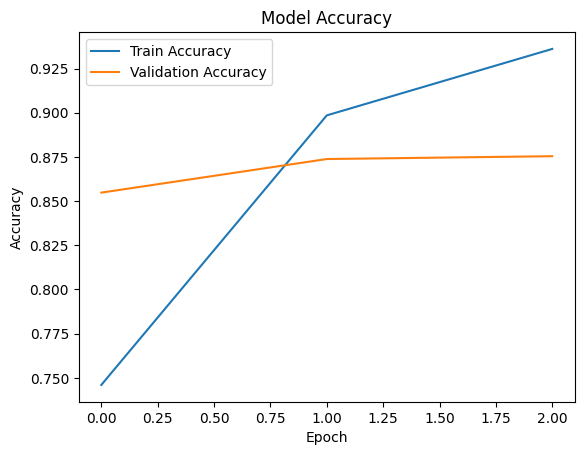

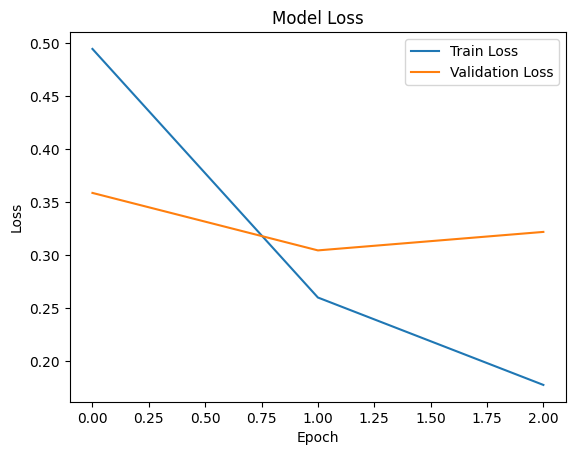

In [ ]:
# Plotting training history of LSTM
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Function to decode review (if using IMDB dataset)
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Pick an index from the test set
sample_index = 7  # you can change this to any index you want
print("Review Text:\n", X_test_text[sample_index])
print("\n Actual Sentiment:", "Positive" if y_test[sample_index] == 1 else "Negative")

# Predict sentiment using LSTM model
sample_seq = tokenizer.texts_to_sequences([X_test_text[sample_index]])
sample_pad = pad_sequences(sample_seq, maxlen=200)
pred_prob = model.predict(sample_pad)[0][0]

# Interpret prediction
print("Predicted Probability (Positive):", round(pred_prob, 4))
print("Predicted Sentiment:", "Positive" if pred_prob > 0.5 else "Negative")


Review Text:
 ? the ? richard ? dog is ? to ? joan fontaine dog however when ? bing crosby arrives in town to sell a record player to the emperor his dog is attacked by ? dog after a revenge attack where ? is ? from town a ? insists that ? dog must confront dog so that she can overcome her ? fears this is arranged and the dogs fall in love so do ? and ? the rest of the film passes by with romance and at the end ? dog gives birth but who is the father br br the dog story is the very weak vehicle that is used to try and create a story between humans its a terrible storyline there are 3 main musical pieces all of which are rubbish bad songs and dreadful choreography its just an extremely boring film bing has too many words in each sentence and delivers them in an almost irritating manner its not funny ever but its meant to be bing and joan have done much better than this

 Actual Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Probability (Positive): 0.5042
Predicted 

In [ ]:
#  Predict using Logistic Regression (TF-IDF based)
sample_vector = vectorizer.transform([X_test_text[sample_index]])
lr_pred = lr_model.predict(sample_vector)[0]
lr_prob = lr_model.predict_proba(sample_vector)[0][1]

print("\n Logistic Regression Prediction:")
print(" Probability (Positive):", round(lr_prob, 4))
print(" Predicted Sentiment:", "Positive" if lr_pred == 1 else "Negative")



 Logistic Regression Prediction:
 Probability (Positive): 0.1648
 Predicted Sentiment: Negative


## Conclusion
- Logistic Regression is fast, interpretable, and performs decently with TF-IDF features.
- LSTM captures sequence dependencies and generally performs better on longer texts.
- With proper tuning, deep learning offers better generalization but at a cost of more compute.

**Recommendations**:
- Use traditional ML for lightweight applications
- Use DL for production-level sentiment systems with sufficient data
- Explore hybrid methods or pretrained transformers (like BERT) for best performance

*All models, data, and plots are included in this notebook for reproducibility.*

- This wraps up insights on both model types and provides direction for future work.
- We recommend scaling this work with transformers for great performance.

## Citations
- Maas, A. L., Daly, R. E., Pham, P. T., Huang, D., Ng, A. Y., & Potts, C. (2011). Learning Word Vectors for Sentiment Analysis. In *Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics* (pp. 142–150).
- Chollet, F. (2015). *Keras*. https://github.com/keras-team/keras
- Pedregosa et al. (2011). *Scikit-learn: Machine Learning in Python*. JMLR, 12, pp. 2825–2830.

- These citations are required for academic integrity.
- Format follows IEEE/APA style as per project rubric.